# Group 12
### Members:
- DIZON, GAVIN RAINE R.
- PALMARES, ALYSSA JAYE L.
- TEE, GIANCARLO T.

## An Overview

The group would be working on a K-means clustering model for the Five Big Personality traits dataset. To give a brief overview of our task, the goal is to cluster the dataset based on the personality traits in the Big Five Personality Model or the Five-Factor model. The Big Five Personality Model or the Five-Factor Model is used for grouping or clustering people based on personality traits. The model uses common descriptors of common languages. This test is mainly used for career assessment since this gives people more insight in how they react in different situations. In addition, this test uses the Big-Five Factor Markers from the International Personality Item Pool, developed by Goldberg. These are commonly used to describe the human personality and psyche.

## OCEAN or Five Factor Makers

1. **Extraversion (or Extroversion)** which can be identified as someone who gets motivated or energized in the company of others.

2. **Emotional Stability or Neuroticism** is a physical and emotional response to stress and perceived threats in someone’s daily life. This is mostly characterized by sadness or moodiness.
3. **Agreeableness** - these people tend to have high or prosocial behaviors. Moreover, People who exhibit high agreeableness will show signs of trust, altruism, kindness, and affection
4. **Conscientiousness** - includes having high levels of thoughtfulness, good impulse control, and goal-directed behaviors
5. **Openness** - These people are eager to learn and experience new things. They are imaginative and insightful.


### Importing needed libraries

In [1]:
#import sys
#!{sys.executable} -m pip install yellowbrick

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (silhouette_score, calinski_harabasz_score, davies_bouldin_score)
from yellowbrick.cluster import KElbowVisualizer

np.random.seed(0)

## Initializing Functions to be used later

In [3]:
# For visualization
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(15,35))
    for i in range(1, 11):
        plt.subplot(10,3,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=14)

def compare_two_graphs(groupname, questions, arr1, arr2 , grp1_name, grp2_name):
    plt.figure(figsize=(15, 35))
    labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Population"]    
    for i in range(0, len(arr1)):
        plt.subplot(10, 3, i+1)
        height = np.append(arr1[i], arr2[i])
        plt.bar(labels, height=height, color=["blue","blue","blue","blue", "blue", "green"], width = 0.4)
        plt.title(questions[groupname[i-1]], fontsize=14)

## Explaining, Loading, and Preprocessing Data

The data was collected through an online interactive personality test from 2016-2018. This survey was made by the International Personality Item Pool (IPIP). Participants were informed and asked for consent that the data will be recorded and used for research. 

In total, there are `50` questions wherein 10 of which are allotted to a specific factor maker. In the dataset, the questions were labeld as follows:

<body>
<style> 
table td, table th, table tr {text-align:left !important;}
</style>

<table style="text-align: left; float:left;">
    <tr>
        <th>Extroversion</th>
        <th>Emotional Stability</th>
        <th>Agreeableness</th>
        <th>Conscientiousness</th>
        <th>Openness</th>
    </tr>
    <tr>
        <td><b>EXT1</b> I am the life of the party.</td>
        <td><b>EST1</b> I get stressed out easily.</td>
        <td><b>AGR1</b> I feel little concern for others.</td>
        <td><b>CSN1</b> I am always prepared.</td>
        <td><b>OPN1</b> I have a rich vocabulary.</td>
    </tr>
    <tr>
        <td><b>EXT2</b> I don't talk a lot.</td>
        <td><b>EST2</b> I am relaxed most of the time.</td>
        <td><b>AGR2</b> I am interested in people.</td>
        <td><b>CSN2</b> I leave my belongings around.</td>
        <td><b>OPN2</b> I have difficulty understanding abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT2</b> I don't talk a lot.</td>
        <td><b>EST2</b> I am relaxed most of the time.</td>
        <td><b>AGR2</b> I am interested in people.</td>
        <td><b>CSN2</b> I leave my belongings around.</td>
        <td><b>OPN2</b> I have difficulty understanding abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT3</b> I feel comfortable around people.</td>
        <td><b>EST3</b> I worry about things.</td>
        <td><b>AGR3</b> I insult people.</td>
        <td><b>CSN3</b> I pay attention to details.</td>
        <td><b>OPN3</b> I have a vivid imagination.</td>
    </tr>
    <tr>
        <td><b>EXT4</b> I keep in the background.</td>
        <td><b>EST4</b> I seldom feel blue.</td>
        <td><b>AGR4</b> I sympathize with others' feelings.</td>
        <td><b>CSN4</b> I make a mess of things.</td>
        <td><b>OPN4</b> I am not interested in abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT5</b> I start conversations.</td>
        <td><b>EST5</b> I am easily disturbed.</td>
        <td><b>AGR5</b> I am not interested in other people's problems.</td>
        <td><b>CSN5</b> I get chores done right away.</td>
        <td><b>OPN5</b> I have excellent ideas.</td>
    </tr>
    <tr>
        <td><b>EXT6</b> I have little to say.</td>
        <td><b>EST6</b> I get upset easily.</td>
        <td><b>AGR6</b> I have a soft heart.</td>
        <td><b>CSN6</b> I often forget to put things back in their proper place.</td>
        <td><b>OPN6</b> I do not have a good imagination.</td>
    </tr>
    <tr>
        <td><b>EXT7</b> I talk to a lot of different people at parties.</td>
        <td><b>EST7</b> I change my mood a lot.</td>
        <td><b>AGR7</b> I am not really interested in others.</td>
        <td><b>CSN7</b> I like order.</td>
        <td><b>OPN7</b> I am quick to understand things.</td>
    </tr>
    <tr>
        <td><b>EXT8</b> I don't like to draw attention to myself.</td>
        <td><b>EST8</b> I have frequent mood swings.</td>
        <td><b>AGR8</b> I take time out for others.</td>
        <td><b>CSN8</b> I shirk my duties.</td>
        <td><b>OPN8</b> I use difficult words.</td>
    </tr>
    <tr>
        <td><b>EXT9</b> I don't mind being the center of attention.</td>
        <td><b>EST9</b> I get irritated easily.</td>
        <td><b>AGR9</b> I feel others' emotions.</td>
        <td><b>CSN9</b> I follow a schedule.</td>
        <td><b>OPN9</b> I spend time reflecting on things.</td>
    </tr>
    <tr>
        <td><b>EXT10</b> I am quiet around strangers.</td>
        <td><b>EST10</b> I often feel blue.</td>
        <td><b>AGR10</b> I make people feel at ease.</td>
        <td><b>CSN10</b> I am exacting in my work.</td>
        <td><b>OPN10</b> I am full of ideas.</td>
    </tr>
</table>   
</body>

Another columns present in the given dataset are the `country` where the survey was answered, `IPC` or the number of users that share the same IP address when taking the test, and the screen size used when taking the test. There are also columns which measures the time they spent on a single question, the start page, and the end page.

### Removing Unused Columns and Rows with Missing Data

Since the only valid data from the dataset are the tables related to the survey such as columns containing Personality related questions like  (EXT, EST , AGR, CSN, and OPN) and the IPC, the other unrelated columns are truncated. The rows with missing values are also dropped.

In [4]:
data = pd.read_csv('data/data-final.csv', sep='\t')
pd.options.display.max_columns = 150

# drop unused columns
data.drop(data.columns[50:], axis=1, inplace=True)

print('How many missing values? ', data.isnull().values.sum())
# drop any rows with missing values.
data.dropna(inplace=True)
print('Number of participants: ', len(data))
data.head()

How many missing values?  89150
Number of participants:  1013558


EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0   4.0   2.0   2.0   2.0   2.0   2.0   3.0    2.0   2.0   5.0   2.0   4.0   
1   4.0   1.0   3.0   1.0   2.0   1.0   3.0    1.0   1.0   4.0   1.0   5.0   
2   4.0   2.0   2.0   2.0   2.0   2.0   1.0    3.0   1.0   4.0   1.0   4.0   
3   3.0   2.0   3.0   2.0   2.0   2.0   4.0    3.0   2.0   4.0   3.0   4.0   
4   5.0   3.0   1.0   1.0   1.0   1.0   3.0    2.0   1.0   5.0   1.0   5.0   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0   2.0   3.0   2.0   4.0   3.0    4.0   3.0   4.0   3.0   2.0   2.0   4.0   
1   1.0   5.0   3.0   4.0   5.0    3.0   3.0   2.0   5.0   3.0   3.0   1.0   
2   2.0   4.0   1.0   4.0   4.0    3.0   4.0   2.0   2.0   2.0   3.0   3.0   
3   2.0   4.0   2.0   4.0   3.0    4.0   2.0   4.0   4.0   4.0   1.0   2.0   
4   1.0   3.0   1.0   5.0   5.0    3.0   5.0   1.0   5.0   1.0   3.0   1.0   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0   4.0   2.0   4.0    4.0   5.0   1.0   4.0   1.0   4.0   1.0   5.0   3.0   
1   3.0   3.0   5.0    3.0   1.0   2.0   4.0   2.0   3.0   1.0   4.0   2.0   
2   4.0   2.0   4.0    2.0   5.0   1.0   2.0   1.0   4.0   2.0   5.0   3.0   
3   2.0   3.0   1.0    4.0   4.0   2.0   5.0   2.0   3.0   1.0   4.0   4.0   
4   5.0   1.0   5.0    5.0   5.0   1.0   5.0   1.0   5.0   1.0   5.0   3.0   

   OPN9  OPN10  
0   4.0    5.0  
1   5.0    3.0  
2   4.0    4.0  
3   3.0    3.0  
4   5.0    5.0

## Initializing Variables for Visualization

In [5]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'
}


EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]



# Exploratory Data Analysis (EDA)

## Data Visualization

Here, we show the number of respondents and their answers for each questions for each personality makers. 

Q&As Related to Extroversion Personality


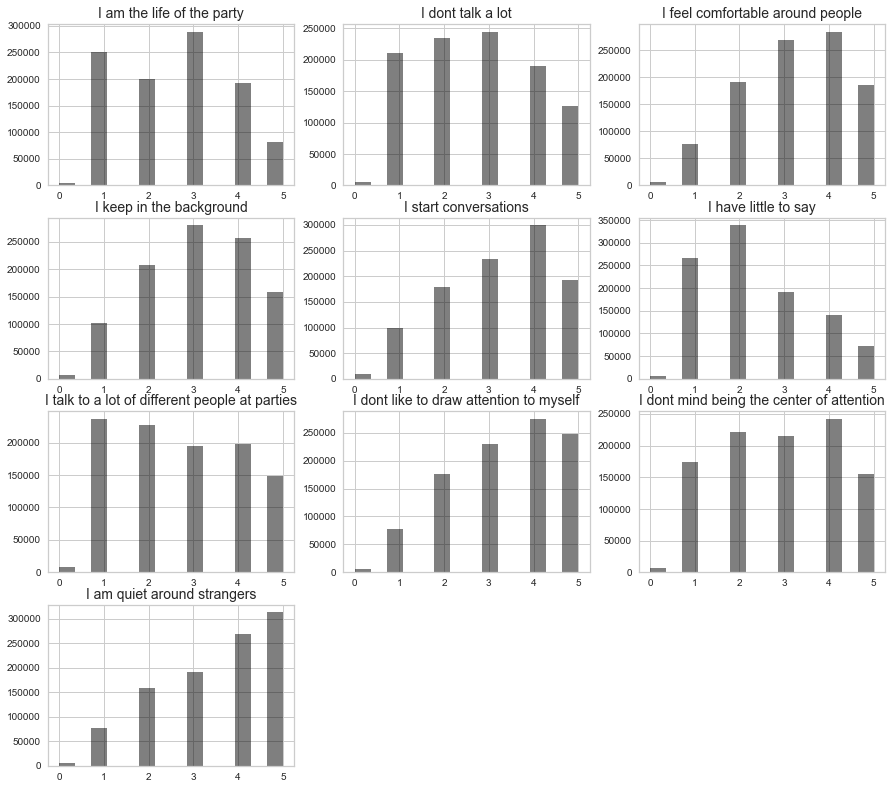

In [6]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'black')

Q&As Related to Emotional Stability Personality


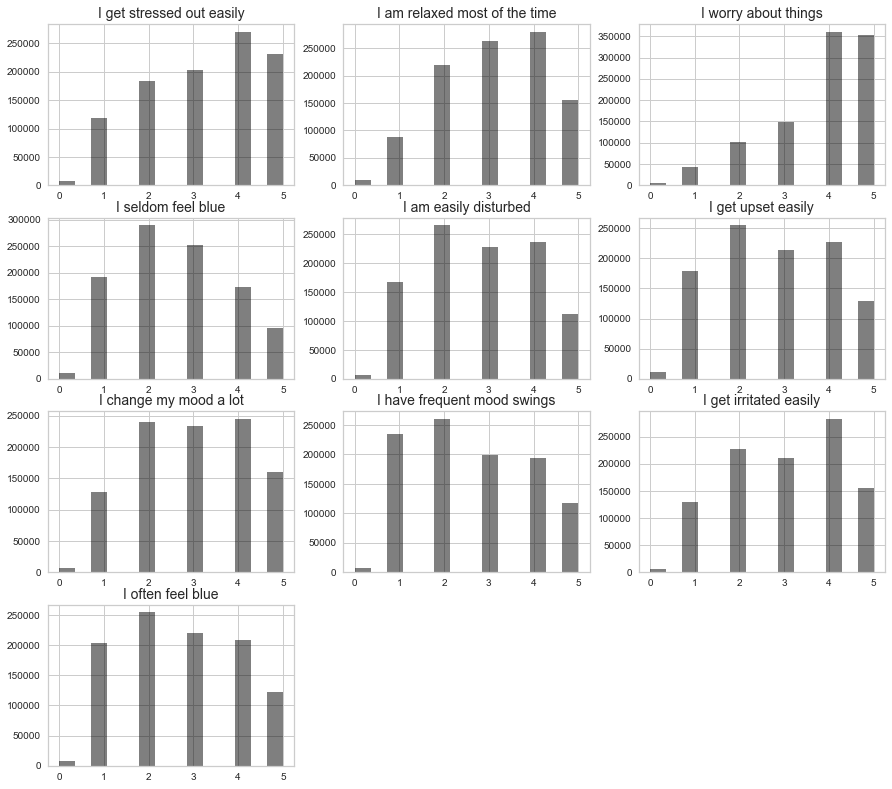

In [7]:
print('Q&As Related to Emotional Stability Personality')
vis_questions(EST, est_questions, 'black')

Q&As Related to Agreeableness Personality


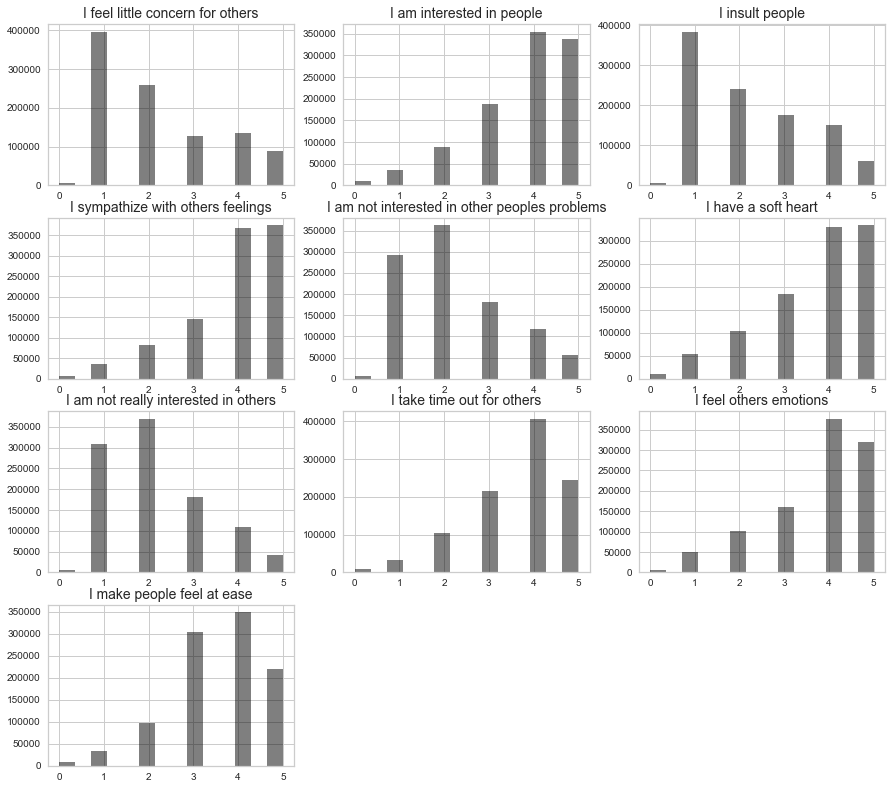

In [8]:
print('Q&As Related to Agreeableness Personality')
vis_questions(AGR, agr_questions, 'black')

Q&As Related to Conscentiousness Personality


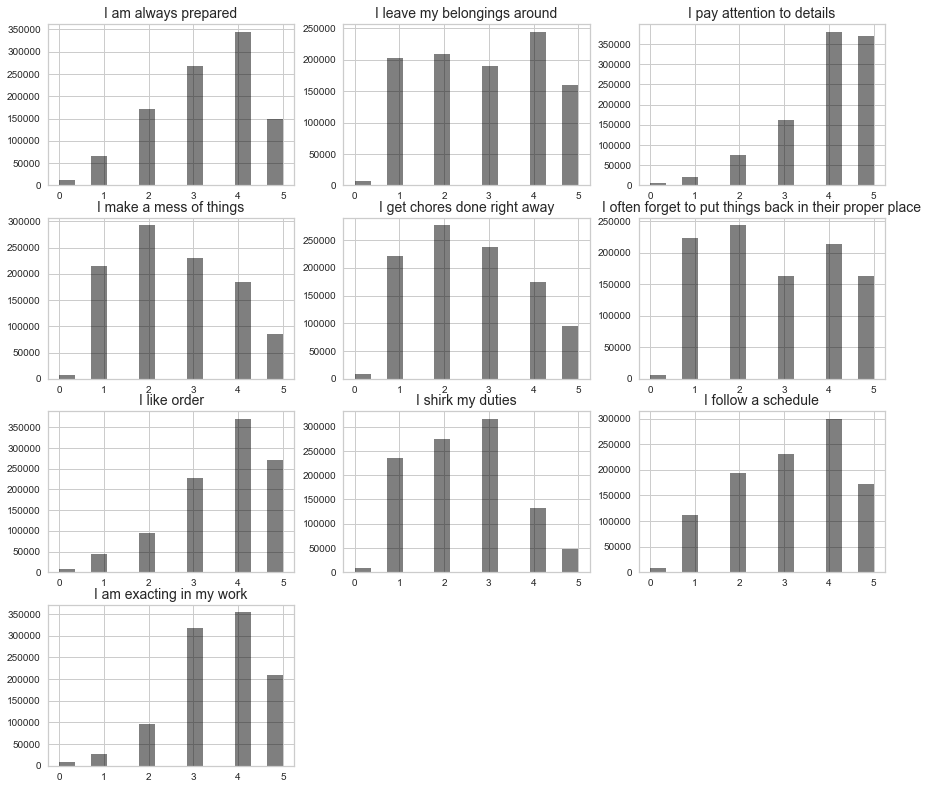

In [9]:
print('Q&As Related to Conscentiousness Personality')
vis_questions(CSN, csn_questions, 'black')

Q&As Related to Openness Personality


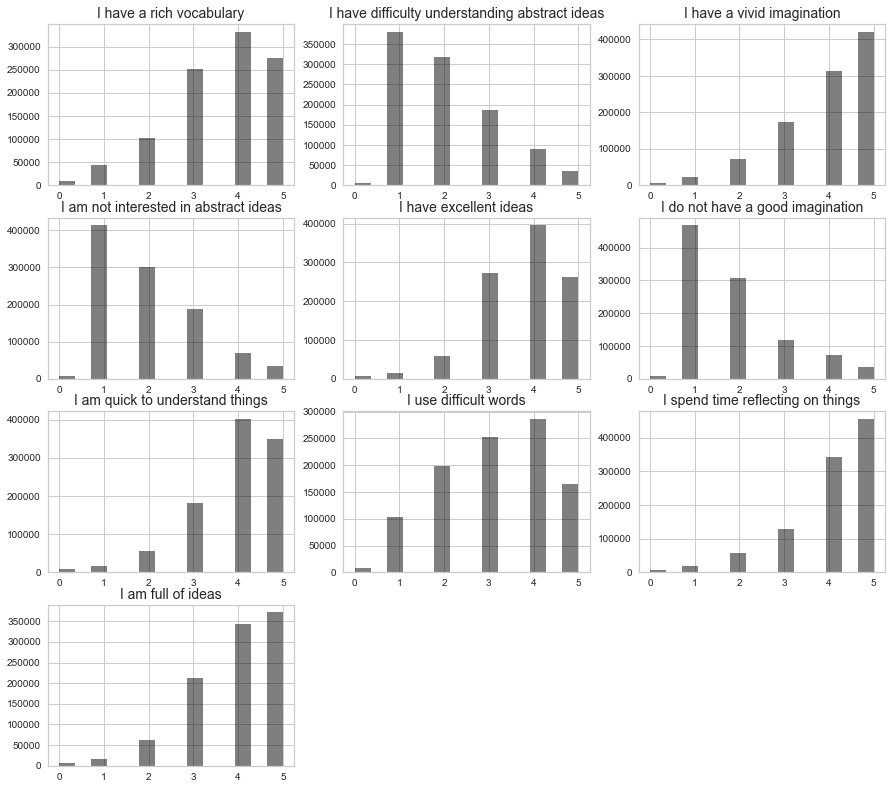

In [10]:
print('Q&As Related to Openness Personality')
vis_questions(OPN, opn_questions, 'black')


# The Task

The main task is to create clusters with the given data. The main problem with these kind of dataset is that there is no exact `label` that we can use to create the clustering. There are unsupervised machine learning models that handle this situation but for this experiment, we will be using the **K-Means cluster**.


> K-means cluster is an iterative algorithm that divides an unlabeled dataset into *k* different clusters in such a way that each row in the dataset belongs only to one group that has similar properties or `features`. 

Similar, to the K-nearest neighbor algorithm, this algorithm makes use of a centroid where each cluster is associated with it. Since we will be evaulating the five personality makers, we will be setting our number of clusters `k` to 5.

In [11]:
df = data

kmeans = KMeans(n_clusters=5, random_state=42)
k_fit = kmeans.fit(df)
predictions = k_fit.labels_

# Create a new column of clusters to predict the data
df['Cluster'] = predictions

### Analysis

Now, we get the mean of each of the personality makers for each clusters. 

In [12]:
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df[ext].sum(axis=1)/10
data_sums['neurotic'] = df[est].sum(axis=1)/10
data_sums['agreeable'] = df[agr].sum(axis=1)/10
data_sums['conscientious'] = df[csn].sum(axis=1)/10
data_sums['open'] = df[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

extroversion  neurotic  agreeable  conscientious      open
clusters                                                            
0             2.910953  2.524347   2.853755       2.916242  3.120476
1             2.966384  3.645550   3.149011       3.173057  3.245575
2             3.072122  3.421990   3.299363       3.210232  3.352329
3             3.051656  2.999795   3.190347       3.161837  3.245515
4             3.085537  2.420967   3.208454       3.106442  3.326843

## Principal Component Analysis

**Prinicipal Component analysis (PCA)** is a dimensionality-reduction method used to reduce dimensionality (or features) of large datasets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. However, dimensionality-reduction would have a minimal trade-off to the accuracy of the result. Here, we use PCA to visualize the personality clusters. To do this, we will be reducing the features from 50 (the number of questions) to 2 `n_components`. This is for us to visualize the graph in a 2D-plane.

In [13]:
#PCA?

In [14]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions

### Visualizing with PCA

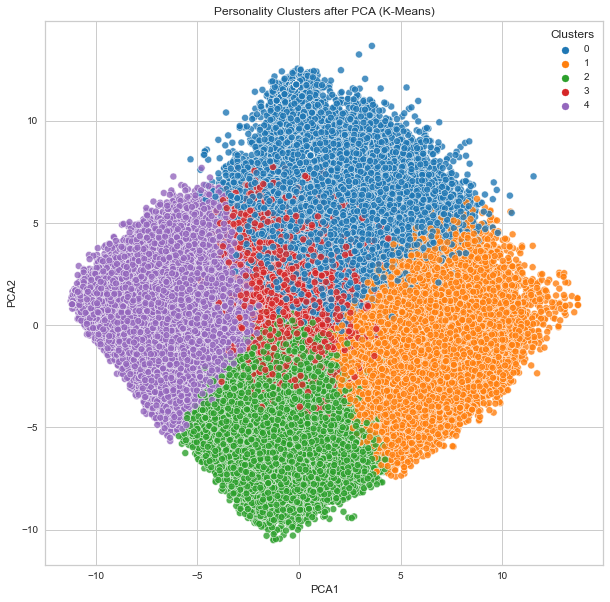

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (K-Means)');

## T-Distributed Stochastic Neighbor Embedding

**T-Distributed Stochastic Neighbor Embedding or TSNE** is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. Similar to the PCA, we will be using this technique to trim down our 50 features to 2 to easily visualize it in a scatterplot. Unlike the PCA, t-SNE preserves only small pairwise distances or local similarities.



In [16]:
tsne_sample = df.sample(50000, random_state=42)

### Visualizing with T-SNE

In [17]:
tsne_embedded = TSNE(n_components=2, init='random', learning_rate='auto').fit_transform(tsne_sample.drop("Cluster", axis=1))
tsne_df = pd.DataFrame(data=tsne_embedded, columns=['X','y'])
tsne_df['Clusters'] = list(tsne_sample['Cluster'])

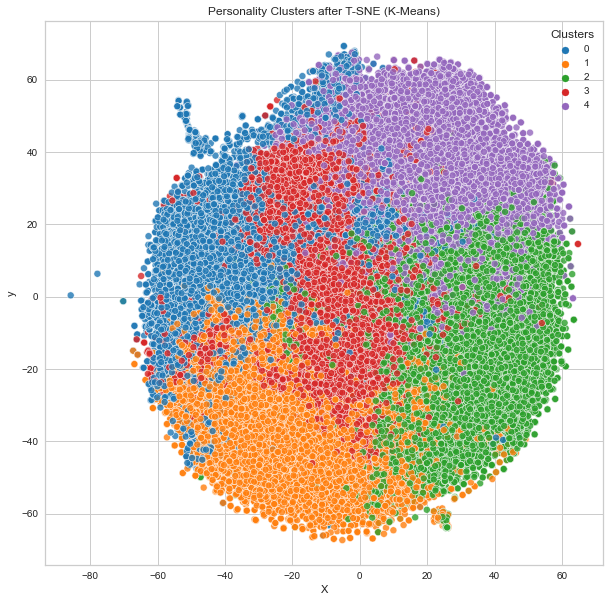

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=tsne_df, x='X', y='y', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after T-SNE (K-Means)');

## Finding an optimum number of clusters

The question now is is the value `5` the best `k` for the clustering given the data. There are different methods to find an optimum number of k.

### Elbow Method

`KElbowVisualizer` is used to find an optimal number  of clusters for k-means clustering using the **elbow** method. Here, we pass a range of k's to evaluate. Once we fit this to the data we can make use of its attribute, the elbow value which is the optimum value.

In [19]:
#KElbowVisualizer?
# Elbow Method - (check)
# Gap Statistics - (wala pa) 

In [20]:
df_opt = data.drop('Cluster', axis=1)

columns = list(df_opt.columns)
#columns.remove('Cluster')

scaler = MinMaxScaler(feature_range=(0,1))
df_opt = scaler.fit_transform(df_opt)
df_opt = pd.DataFrame(df_opt, columns=columns)
visualizer = KElbowVisualizer(KMeans(verbose=1), k=(2,8))

In [21]:
visualizer.elbow_value_

With the graph shown above, we can prove that `5` is the most optimal number for clustering the dataset. Now let's try to find the optimum number with the `Gap Statistics` method.


### Gap Statistics

# Alternative Models

Other than the usual K-means cluster approach, there are also alternative methods that we can use to cluster an unlabeled dataset. 

## Batch K-Means

Mini-Batch K-Means uses small, random fixed-size batch of data to store in memory and with each iteration, a random sample of the data will be collected and used in updating the clusters.


In [22]:
#MiniBatchKMeans?

In [23]:
df_mb = data

mbKMeans = MiniBatchKMeans(n_clusters=5, max_iter=500, verbose=1, random_state=42)
mbKMeans.fit(df_mb)

# Create a new column of clusters to predict the data
df_mb['Cluster'] = mbKMeans.labels_

Init 1/3 with method k-means++
Inertia for init 1/3: 289565.0
Init 2/3 with method k-means++
Inertia for init 2/3: 273126.0
Init 3/3 with method k-means++
Inertia for init 3/3: 302201.0
Minibatch step 1/494901: mean batch inertia: 87.0185546875
Minibatch step 2/494901: mean batch inertia: 65.68389648394641, ewa inertia: 65.68389648394641
Minibatch step 3/494901: mean batch inertia: 63.040419449059215, ewa inertia: 65.67855506724798
Minibatch step 4/494901: mean batch inertia: 62.53076298903056, ewa inertia: 65.67219463023723
Minibatch step 5/494901: mean batch inertia: 62.32080703246139, ewa inertia: 65.6654228075804
Minibatch step 6/494901: mean batch inertia: 60.60973003022478, ewa inertia: 65.65520726136353
Minibatch step 7/494901: mean batch inertia: 60.017575970228314, ewa inertia: 65.64381584864434
Minibatch step 8/494901: mean batch inertia: 60.94470808163867, ewa inertia: 65.63432081904386
Minibatch step 9/494901: mean batch inertia: 62.728370411974055, ewa inertia: 65.62844904

Minibatch step 205/494901: mean batch inertia: 61.67306147221157, ewa inertia: 63.99509808482506
Minibatch step 206/494901: mean batch inertia: 58.78378275016709, ewa inertia: 63.98456808725672
Minibatch step 207/494901: mean batch inertia: 61.83853054408821, ewa inertia: 63.98023179811282
Minibatch step 208/494901: mean batch inertia: 60.45916139731279, ewa inertia: 63.973117113934755
Minibatch step 209/494901: mean batch inertia: 59.63902361650551, ewa inertia: 63.964359633134194
Minibatch step 210/494901: mean batch inertia: 60.86105946042575, ewa inertia: 63.95808909658555
Minibatch step 211/494901: mean batch inertia: 60.35870496179163, ewa inertia: 63.95081617146915
Minibatch step 212/494901: mean batch inertia: 61.66206154446246, ewa inertia: 63.946191507807626
Minibatch step 213/494901: mean batch inertia: 60.457665138116624, ewa inertia: 63.93914258218502
Minibatch step 214/494901: mean batch inertia: 62.08292916442123, ewa inertia: 63.935391912436565
Minibatch step 215/494901

Minibatch step 337/494901: mean batch inertia: 61.42420366997207, ewa inertia: 63.204020194204766
Minibatch step 338/494901: mean batch inertia: 59.5275571951091, ewa inertia: 63.196591523331
Minibatch step 339/494901: mean batch inertia: 60.83267083705698, ewa inertia: 63.191814978931035
Minibatch step 340/494901: mean batch inertia: 59.73160997442264, ewa inertia: 63.18482327953393
Minibatch step 341/494901: mean batch inertia: 61.61054340824735, ewa inertia: 63.181642285456235
Minibatch step 342/494901: mean batch inertia: 60.29717805677118, ewa inertia: 63.175813929395716
Minibatch step 343/494901: mean batch inertia: 60.826127772019575, ewa inertia: 63.17106614732254
Minibatch step 344/494901: mean batch inertia: 61.89125827882807, ewa inertia: 63.16848016415366
Minibatch step 345/494901: mean batch inertia: 60.18705408994366, ewa inertia: 63.16245588673125
Minibatch step 346/494901: mean batch inertia: 59.449931203064594, ewa inertia: 63.15495434952212
Minibatch step 347/494901: 

Minibatch step 424/494901: mean batch inertia: 59.63893820590554, ewa inertia: 62.77469213686119
Minibatch step 425/494901: mean batch inertia: 62.11363675509228, ewa inertia: 62.77335640660586
Minibatch step 426/494901: mean batch inertia: 61.10829549383925, ewa inertia: 62.76999198011531
Minibatch step 427/494901: mean batch inertia: 59.79056862297509, ewa inertia: 62.76397174938832
Minibatch step 428/494901: mean batch inertia: 60.38151558820363, ewa inertia: 62.75915775215866
Minibatch step 429/494901: mean batch inertia: 60.95171414597559, ewa inertia: 62.75550562682066
Minibatch step 430/494901: mean batch inertia: 60.486796012533524, ewa inertia: 62.75092146616493
Minibatch step 431/494901: mean batch inertia: 62.974620310493066, ewa inertia: 62.75137347264229
Minibatch step 432/494901: mean batch inertia: 59.25573885548789, ewa inertia: 62.744310184076035
Minibatch step 433/494901: mean batch inertia: 60.59501963180594, ewa inertia: 62.739967321893324
Minibatch step 434/494901:

Minibatch step 510/494901: mean batch inertia: 62.04808060276989, ewa inertia: 62.44397620316219
Minibatch step 511/494901: mean batch inertia: 62.461872531935875, ewa inertia: 62.44401236453152
Minibatch step 512/494901: mean batch inertia: 59.301403117697454, ewa inertia: 62.43766239996358
Minibatch step 513/494901: mean batch inertia: 63.030878326078174, ewa inertia: 62.43886105363513
Minibatch step 514/494901: mean batch inertia: 59.33088109685838, ewa inertia: 62.432581061102404
Minibatch step 515/494901: mean batch inertia: 61.860102689491754, ewa inertia: 62.43142430978841
Minibatch step 516/494901: mean batch inertia: 60.6746637843535, ewa inertia: 62.42787459481762
Minibatch step 517/494901: mean batch inertia: 63.67742229524407, ewa inertia: 62.43039943421076
Minibatch step 518/494901: mean batch inertia: 60.58197696495732, ewa inertia: 62.4266645068735
Minibatch step 519/494901: mean batch inertia: 59.33929033984269, ewa inertia: 62.42042615045412
Minibatch step 520/494901: 

Minibatch step 595/494901: mean batch inertia: 60.641580384479255, ewa inertia: 62.14406294784418
Minibatch step 596/494901: mean batch inertia: 60.00228253731165, ewa inertia: 62.13973526067376
Minibatch step 597/494901: mean batch inertia: 59.99216738649975, ewa inertia: 62.13539587933897
Minibatch step 598/494901: mean batch inertia: 59.58362139172764, ewa inertia: 62.130239757050454
Minibatch step 599/494901: mean batch inertia: 61.6068392863034, ewa inertia: 62.12918217267294
Minibatch step 600/494901: mean batch inertia: 59.90504135374589, ewa inertia: 62.124688067843174
Minibatch step 601/494901: mean batch inertia: 59.31534198056323, ewa inertia: 62.11901149569814
Minibatch step 602/494901: mean batch inertia: 59.827509197344725, ewa inertia: 62.11438128008462
Minibatch step 603/494901: mean batch inertia: 61.15397453824524, ewa inertia: 62.11244067967825
Minibatch step 604/494901: mean batch inertia: 60.06070303314016, ewa inertia: 62.10829493315525
Minibatch step 605/494901: 

Minibatch step 682/494901: mean batch inertia: 62.21236537456488, ewa inertia: 61.881449823736
Minibatch step 683/494901: mean batch inertia: 60.10686539386866, ewa inertia: 61.8778640937367
Minibatch step 684/494901: mean batch inertia: 59.93794179886453, ewa inertia: 61.87394428160943
Minibatch step 685/494901: mean batch inertia: 61.20022039824586, ewa inertia: 61.87258295334623
Minibatch step 686/494901: mean batch inertia: 60.34607705106585, ewa inertia: 61.869498491476854
Minibatch step 687/494901: mean batch inertia: 60.1339891906438, ewa inertia: 61.86599171678677
Minibatch step 688/494901: mean batch inertia: 59.695166341412694, ewa inertia: 61.861605341283465
Minibatch step 689/494901: mean batch inertia: 60.245139687776785, ewa inertia: 61.85833910650248
Minibatch step 690/494901: mean batch inertia: 58.60761894983304, ewa inertia: 61.85177069274377
Minibatch step 691/494901: mean batch inertia: 61.31304723269943, ewa inertia: 61.8506821466935
Minibatch step 692/494901: mean

Minibatch step 769/494901: mean batch inertia: 61.461387959005904, ewa inertia: 61.6643257629896
Minibatch step 770/494901: mean batch inertia: 61.31156768802538, ewa inertia: 61.66361297908898
Minibatch step 771/494901: mean batch inertia: 60.60516447007963, ewa inertia: 61.66147427522818
Minibatch step 772/494901: mean batch inertia: 59.06651397880623, ewa inertia: 61.656230891579995
Minibatch step 773/494901: mean batch inertia: 60.21575066783868, ewa inertia: 61.653320253424525
Minibatch step 774/494901: mean batch inertia: 60.834388631254185, ewa inertia: 61.65166551801968
Minibatch step 775/494901: mean batch inertia: 60.281869701001334, ewa inertia: 61.64889770496366
Minibatch step 776/494901: mean batch inertia: 60.41503396774341, ewa inertia: 61.64640455662811
Minibatch step 777/494901: mean batch inertia: 58.752399098969605, ewa inertia: 61.64055692153506
Minibatch step 778/494901: mean batch inertia: 59.215143432048436, ewa inertia: 61.635656124614044
Minibatch step 779/4949

Minibatch step 855/494901: mean batch inertia: 60.87646428972894, ewa inertia: 61.50020459889144
Minibatch step 856/494901: mean batch inertia: 61.42418671241649, ewa inertia: 61.50005099694869
Minibatch step 857/494901: mean batch inertia: 60.65504059336607, ewa inertia: 61.498343566689044
Minibatch step 858/494901: mean batch inertia: 60.54592131528979, ewa inertia: 61.4964190997652
Minibatch step 859/494901: mean batch inertia: 62.19490722273578, ewa inertia: 61.49783046671655
Minibatch step 860/494901: mean batch inertia: 60.97331893183149, ewa inertia: 61.4967706373199
Minibatch step 861/494901: mean batch inertia: 59.86835216715268, ewa inertia: 61.49348025064591
Minibatch step 862/494901: mean batch inertia: 61.087440745239086, ewa inertia: 61.49265980614581
Minibatch step 863/494901: mean batch inertia: 63.21749245321107, ewa inertia: 61.49614500756101
Minibatch step 864/494901: mean batch inertia: 63.759564741368344, ewa inertia: 61.50071847947024
Minibatch step 865/494901: me

Minibatch step 973/494901: mean batch inertia: 60.42221375989007, ewa inertia: 61.31395664888985
Minibatch step 974/494901: mean batch inertia: 60.06424285014225, ewa inertia: 61.311431473878
Minibatch step 975/494901: mean batch inertia: 60.752246979045026, ewa inertia: 61.31030158420664
Minibatch step 976/494901: mean batch inertia: 59.54981693688278, ewa inertia: 61.30674434426529
Minibatch step 977/494901: mean batch inertia: 59.41055770822141, ewa inertia: 61.302912904526096
Minibatch step 978/494901: mean batch inertia: 59.0801020803596, ewa inertia: 61.29842148708726
Minibatch step 979/494901: mean batch inertia: 60.223805697318895, ewa inertia: 61.296250115576136
Minibatch step 980/494901: mean batch inertia: 60.53283371112633, ewa inertia: 61.29470755436726
Minibatch step 981/494901: mean batch inertia: 58.72732473667356, ewa inertia: 61.289519893845636
Minibatch step 982/494901: mean batch inertia: 59.172989622465806, ewa inertia: 61.28524322717327
Minibatch step 983/494901: 

### Get Mean

In [24]:
col_list = list(df_mb)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums_mb = pd.DataFrame()
data_sums_mb['extroversion'] = df_mb[ext].sum(axis=1)/10
data_sums_mb['neurotic'] = df_mb[est].sum(axis=1)/10
data_sums_mb['agreeable'] = df_mb[agr].sum(axis=1)/10
data_sums_mb['conscientious'] = df_mb[csn].sum(axis=1)/10
data_sums_mb['open'] = df_mb[opn].sum(axis=1)/10
data_sums_mb['clusters'] = mbKMeans.labels_
data_sums_mb.groupby('clusters').mean()

extroversion  neurotic  agreeable  conscientious      open
clusters                                                            
0             3.072310  3.558075   3.302654       3.255502  3.332980
1             2.957202  3.592370   3.125148       3.162014  3.254116
2             3.092384  2.493412   3.210089       3.136607  3.305255
3             3.056473  2.754678   3.222635       3.076570  3.351833
4             2.950025  2.601789   2.938464       2.968151  3.117146

### Computing the PCA

In [25]:
pca_mb = PCA(n_components=2)
pca_mb_fit = pca_mb.fit_transform(df_mb)

df_pca_mb = pd.DataFrame(data=pca_mb_fit, columns=['PCA1', 'PCA2'])
df_pca_mb['Clusters'] = mbKMeans.labels_
# TSNE

### Visualizing the Model with PCA

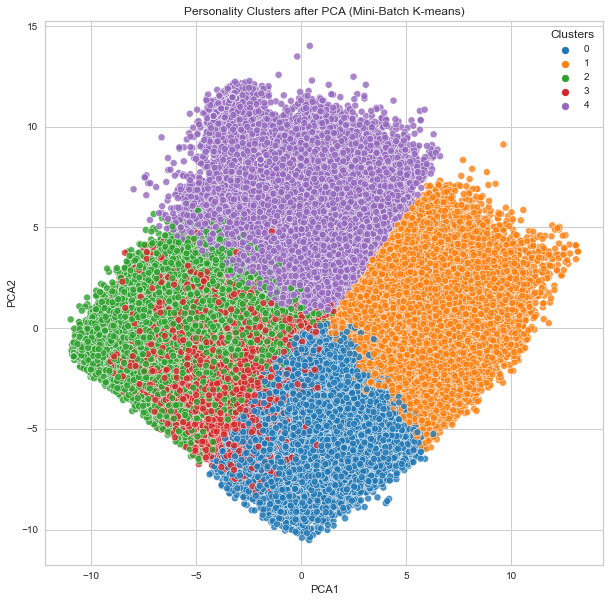

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_mb, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (Mini-Batch K-means)');

### Computing the T-SNE

In [27]:
tsne_sample_mb = df_mb.sample(50000, random_state=42)
cluster_data = list(tsne_sample_mb['Cluster'])

tsne_embedded_mb = TSNE(n_components=2, init='random', learning_rate='auto').fit_transform(tsne_sample_mb.drop("Cluster", axis=1))
tsne_df_mb = pd.DataFrame(data=tsne_embedded_mb, columns=['X','y'])
tsne_df_mb['Clusters'] = cluster_data

### Visualizing the T-SNE

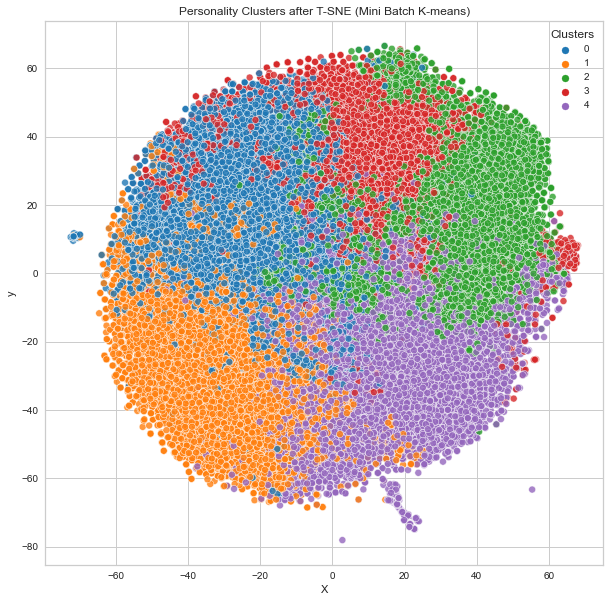

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=tsne_df_mb, x='X', y='y', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after T-SNE (Mini Batch K-means)');

## Gaussian Mixture Model

explain

In [29]:
df_gmm = data

gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(df_gmm)

# Create a new column of clusters to predict the data
df_gmm['Cluster'] = gmm.predict(df_gmm)

### Get Mean

In [30]:
col_list = list(df_gmm)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums_gmm = pd.DataFrame()
data_sums_gmm['extroversion'] = df_gmm[ext].sum(axis=1)/10
data_sums_gmm['neurotic'] = df_gmm[est].sum(axis=1)/10
data_sums_gmm['agreeable'] = df_gmm[agr].sum(axis=1)/10
data_sums_gmm['conscientious'] = df_gmm[csn].sum(axis=1)/10
data_sums_gmm['open'] = df_gmm[opn].sum(axis=1)/10
data_sums_gmm['clusters'] = df_gmm['Cluster']
data_sums_gmm.groupby('clusters').mean()

extroversion  neurotic  agreeable  conscientious      open
clusters                                                            
0             2.957202  3.592370   3.125148       3.162014  3.254116
1             3.072310  3.558075   3.302654       3.255502  3.332980
2             3.056473  2.754678   3.222635       3.076570  3.351833
3             3.092384  2.493412   3.210089       3.136607  3.305255
4             2.950025  2.601789   2.938464       2.968151  3.117146

### Computing for the PCA

In [31]:
pca_gmm = PCA(n_components=2)
pca_gmm_fit = pca_mb.fit_transform(df_gmm)

df_pca_gmm = pd.DataFrame(data=pca_gmm_fit, columns=['PCA1', 'PCA2'])
df_pca_gmm['Clusters'] = list(df_gmm['Cluster'])

### Visualizing the Clusters with PCA

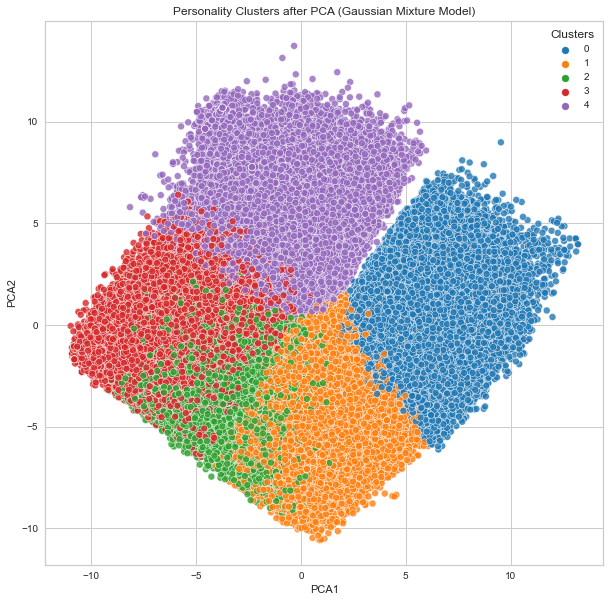

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_gmm, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (Gaussian Mixture Model)');

### Computing the T-SNE

In [33]:
tsne_sample_gmm = df_gmm.sample(50000, random_state=42)
cluster_data_gmm = list(tsne_sample_gmm['Cluster'])
tsne_embedded_gmm = TSNE(n_components=2, init='random', learning_rate='auto').fit_transform(tsne_sample_gmm.drop("Cluster", axis=1))
tsne_df_gmm = pd.DataFrame(data=tsne_embedded_gmm, columns=['X','y'])
tsne_df_gmm['Clusters'] = cluster_data_gmm

### Visualizing the T-SNE

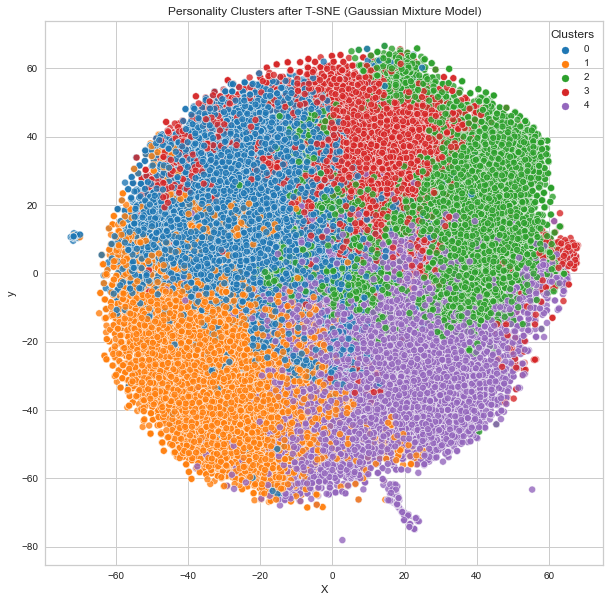

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=tsne_df_mb, x='X', y='y', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after T-SNE (Gaussian Mixture Model)');

### Validating and Evaluating the Clusters (PCA)

In [35]:
col = list(df_pca.columns)
col.remove("Clusters")
col

df_eval = pd.DataFrame(columns=["Model", "Calinski-Harabasz", "Davies_Bouldin", "Silhouette"])
print("Computing Scores in K-Means...")
df_eval.loc[len(df_eval.index)]= ["K-means", calinski_harabasz_score(df_pca[col], df_pca['Clusters']), davies_bouldin_score(df_pca[col], df_pca['Clusters']), silhouette_score(df_pca[col], df_pca['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Mini-Batch K-means...")
df_eval.loc[len(df_eval.index)]= ["Mini-Batch K-means", calinski_harabasz_score(df_pca_mb[col], df_pca_mb['Clusters']), davies_bouldin_score(df_pca_mb[col], df_pca_mb['Clusters']), silhouette_score(df_pca_mb[col], df_pca_mb['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Gaussian Mixture Model...")
df_eval.loc[len(df_eval.index)]= ["Gaussian Mixture Model", calinski_harabasz_score(df_pca_gmm[col], df_pca_gmm['Clusters']), davies_bouldin_score(df_pca_gmm[col], df_pca_gmm['Clusters']), silhouette_score(df_pca_gmm[col], df_pca_gmm['Clusters'], metric='euclidean', sample_size=100000)] 

Computing Scores in K-Means...
Computing Scores in Mini-Batch K-means...
Computing Scores in Gaussian Mixture Model...


In [36]:
df_eval

Model  Calinski-Harabasz  Davies_Bouldin  Silhouette
0                 K-means      534999.411169        1.206671    0.234070
1      Mini-Batch K-means      573852.527074        1.679648    0.243054
2  Gaussian Mixture Model      582666.023331        1.275230    0.247579

In [37]:
# remove column cluster
col = list(tsne_df.columns)
col.remove("Clusters")
col

tsne_df_eval = pd.DataFrame(columns=["Model", "Calinski-Harabasz", "Davies_Bouldin", "Silhouette"])
print("Computing Scores in K-Means...")
tsne_df_eval.loc[len(tsne_df_eval.index)]= ["K-means", calinski_harabasz_score(tsne_df[col], tsne_df['Clusters']), davies_bouldin_score(tsne_df[col], tsne_df['Clusters']), silhouette_score(tsne_df[col], tsne_df['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Mini-Batch K-means...")
tsne_df_eval.loc[len(tsne_df_eval.index)]= ["Mini-Batch K-means", calinski_harabasz_score(tsne_df_mb[col], tsne_df_mb['Clusters']), davies_bouldin_score(tsne_df_mb[col], tsne_df_mb['Clusters']), silhouette_score(tsne_df_mb[col], tsne_df_mb['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Gaussian Mixture Model...")
tsne_df_eval.loc[len(tsne_df_eval.index)]= ["Gaussian Mixture Model", calinski_harabasz_score(tsne_df_gmm[col], tsne_df_gmm['Clusters']), davies_bouldin_score(tsne_df_gmm[col], tsne_df_gmm['Clusters']), silhouette_score(tsne_df_gmm[col], tsne_df_gmm['Clusters'], metric='euclidean', sample_size=100000)] 



Computing Scores in K-Means...
Computing Scores in Mini-Batch K-means...
Computing Scores in Gaussian Mixture Model...


In [38]:
tsne_df_eval

Model  Calinski-Harabasz  Davies_Bouldin  Silhouette
0                 K-means       20395.314966        1.466577    0.191464
1      Mini-Batch K-means       20800.583197        1.346417    0.167661
2  Gaussian Mixture Model       19820.386086        1.487471    0.161236

# Analyzing the Results

Among the three models, the **- Model** that produced the best clustering of data. However in this experiment, we will be analyzing the results from th K-means clustering.

In [39]:
df_cluster = df.groupby('Cluster').mean()

Extroversion Questions: Cluster Mean vs Population Mean comparison


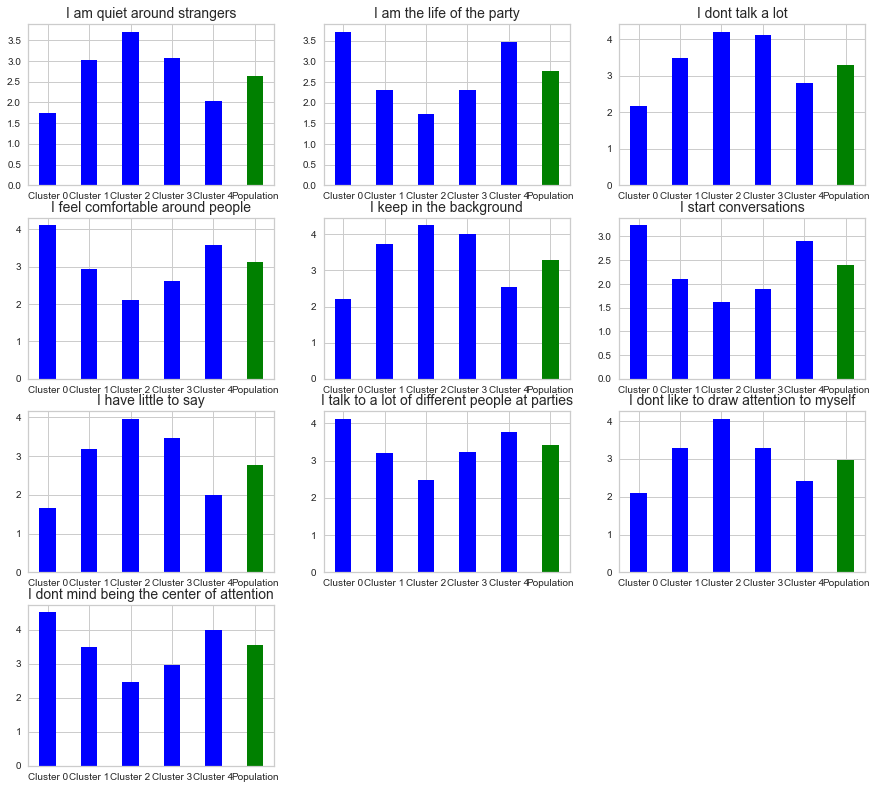

In [40]:
EXT_df_cluster = [column for column in df_cluster if column.startswith('EXT')]
print("Extroversion Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(EXT, ext_questions, df_cluster[EXT_df_cluster].values.transpose(), df[EXT_df_cluster].mean().transpose(), "Cluster ", "Population Mean")

Emotional Stability Questions: Cluster Mean vs Population Mean comparison


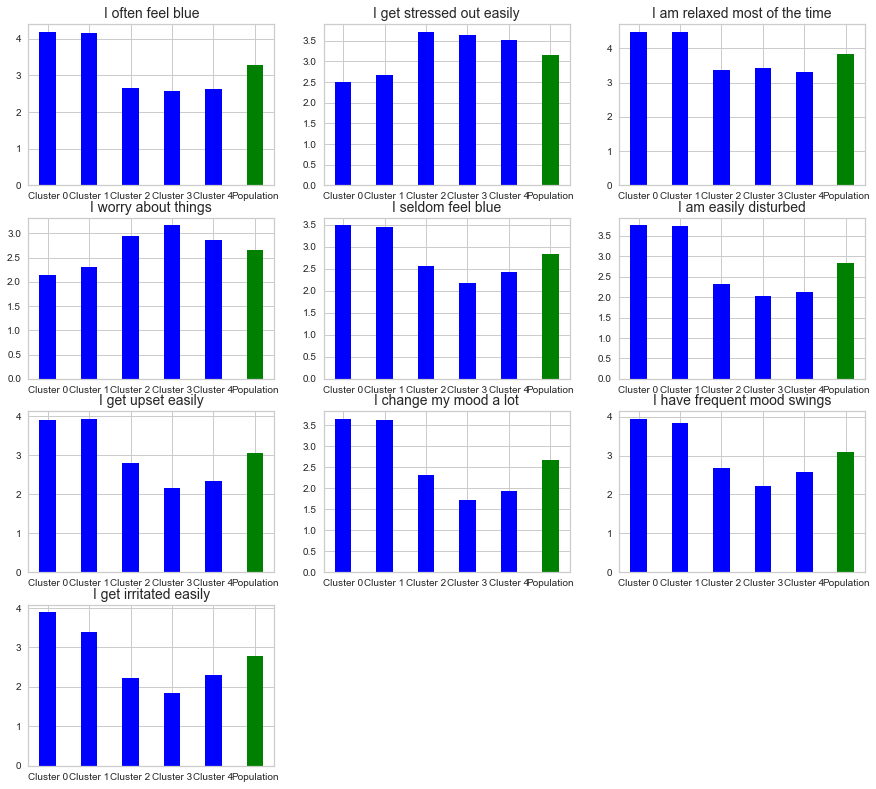

In [41]:
EST_df_cluster = [column for column in df_cluster if column.startswith('EST')]
print("Emotional Stability Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(EST, est_questions, df_cluster[EST_df_cluster].values.transpose(), df[EST_df_cluster].mean().transpose(), "Cluster ", "Population Mean")

Conscientiousness Questions: Cluster Mean vs Population Mean comparison


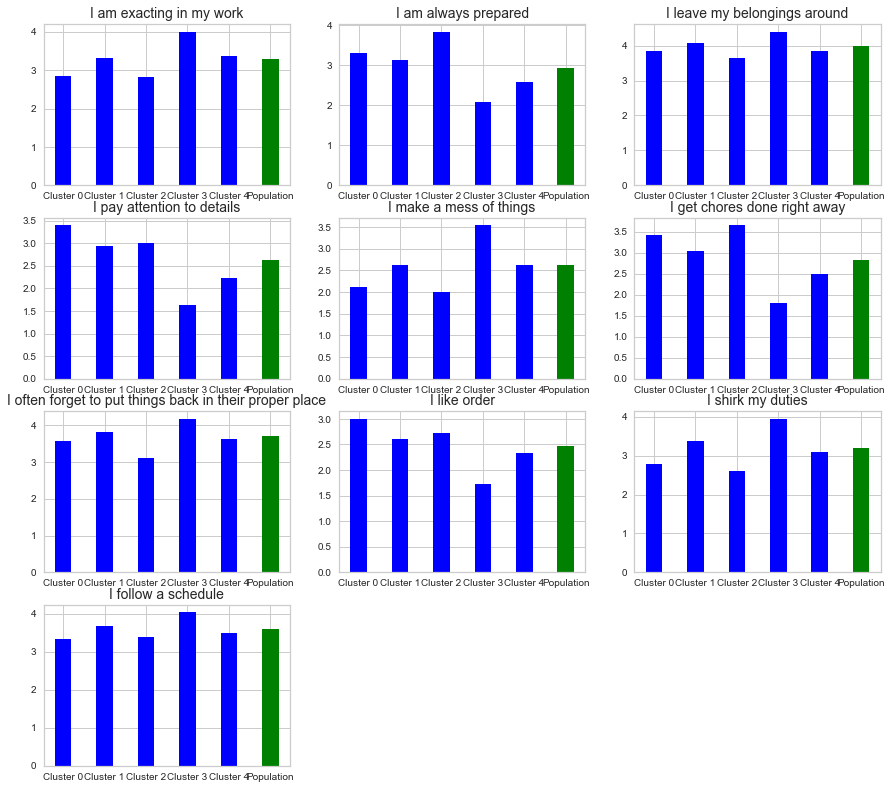

In [42]:
CSN_df_cluster = [column for column in df_cluster if column.startswith('CSN')]
print("Conscientiousness Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(CSN, csn_questions, df_cluster[CSN_df_cluster].values.transpose(), df[CSN_df_cluster].mean().transpose(), "Cluster ", "Population Mean")

Agreeableness Questions: Cluster Mean vs Population Mean comparison


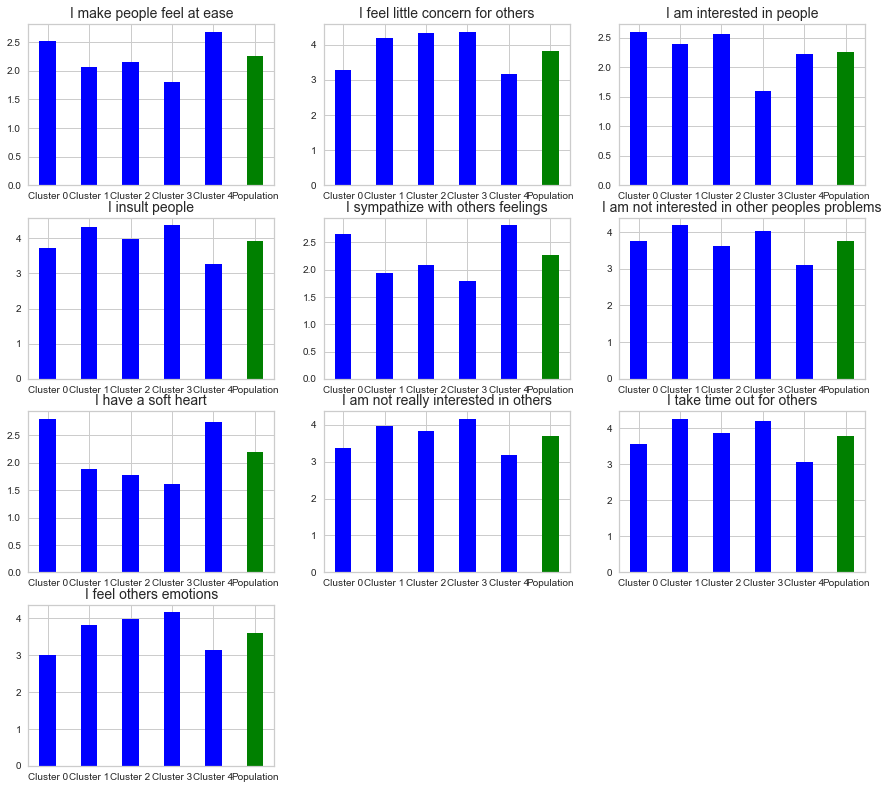

In [43]:
AGR_df_cluster = [column for column in df_cluster if column.startswith('AGR')]
print("Agreeableness Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(AGR, agr_questions, df_cluster[AGR_df_cluster].values.transpose(), df[AGR_df_cluster].mean().transpose(), "Cluster", "Population Mean")

Openness Questions: Cluster Mean vs Population Mean comparison


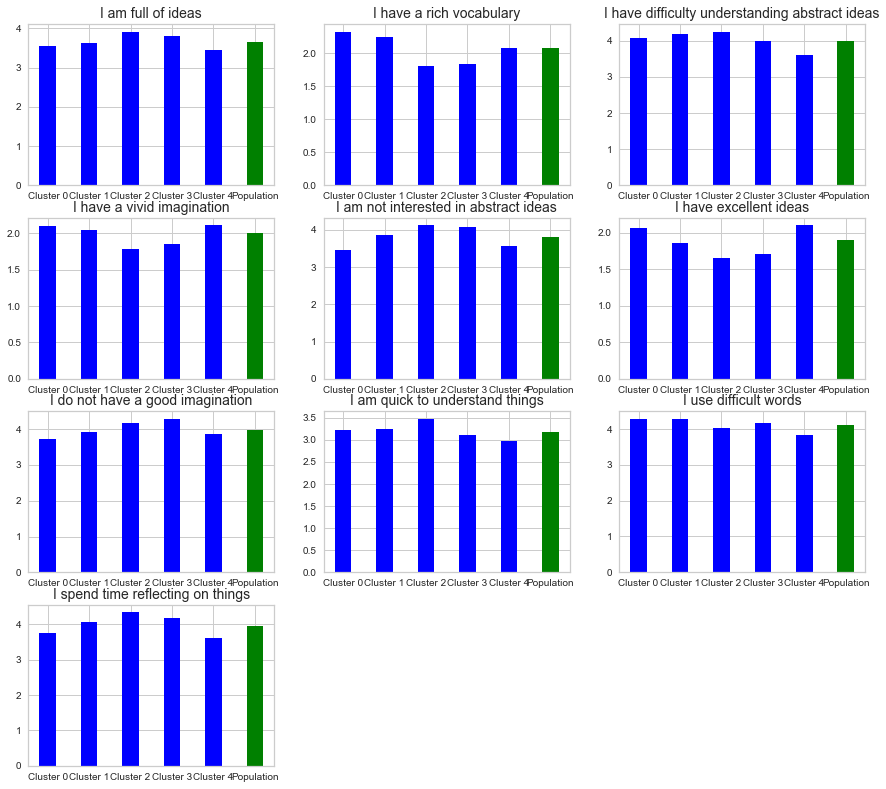

In [44]:
OPN_df_cluster = [column for column in df_cluster if column.startswith('OPN')]
print("Openness Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(OPN, opn_questions, df_cluster[OPN_df_cluster].values.transpose(), df[OPN_df_cluster].mean().transpose(), "Cluster", "Population Mean")